In [1]:
'''import package'''
import numpy as np 
import matplotlib.pyplot as pt
from matplotlib.pyplot import style
style.use('ggplot')
import scipy.optimize as lm
import random as r
r.seed(2020)

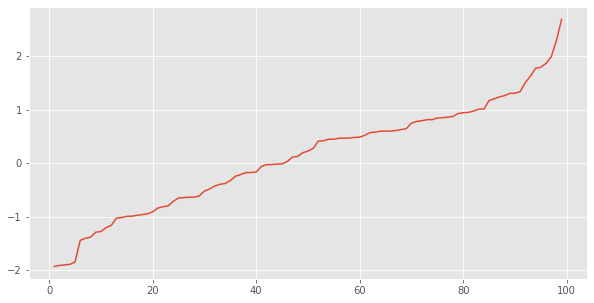

In [2]:
x = np.array(range(1,100))
y = np.random.normal(size=len(x))
y = np.sort(y)
pt.figure(figsize=(10,5))
pt.plot(x,y)

In [45]:
line = lambda p1 , p2 , x : p1 + p2 * x[:]
exp = lambda p1 , p2 , x : p1 * np.exp( p2*x[:] )
# logit = lambda p1 , p2 , x : np.exp(p1 + x[:]*p2) / (1 + np.exp(p1 + x[:]*p2) )

def logit(p1 , p2 , x , i=1):
    return p1 / ( 1 + ( (p1-x[i])/x[i] )*np.exp(-p2*x[i:] ) ) 

# logit = lambda  p , x : p / ( 1 + ( ( - p)/ p) * np.exp(-p*x[:] ) )

class error :
    def mline(self,p,x,y):
        p1 , p2 = p
        return np.sum(np.power(y-line(p1,p2,x),2))  
    
    def mexp(self,p,x,y):
        p1 , p2 = p
        return np.sum(np.power(y-exp(p1,p2,x),2))
    
    def mlogit(self,p,x,y):
        p1 , p2 = p
        return np.sum(np.power(y-logit(p1,p2,x),2))
#         return np.sum( (y-logit(p1,p2,x)) * x )

In [28]:
b = error()
p = [0,0]
b.mline(p,x,y)

102.85743950782864

(-0.04150696452083818, 0.011226363629279028)

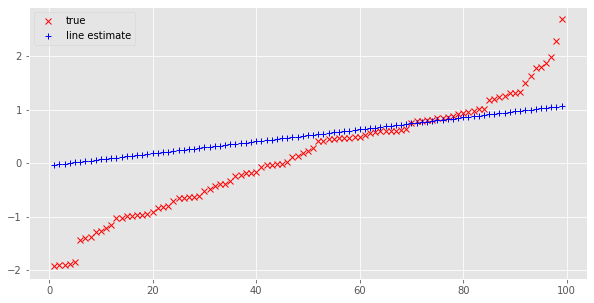

In [29]:
e = error()
p = [0,0]
params_line = lm.least_squares(e.mline,p,args=(x,y)).x
p1 , p2 = params_line
pt.figure(figsize=(10,5))
pt.plot(x , y , 'rx' , label = 'true')
pt.plot(x , line(p1,p2,x),'b+' , label = 'line estimate')
pt.legend()

p1 , p2

(0.0186605007231023, 0.04845955316495037)

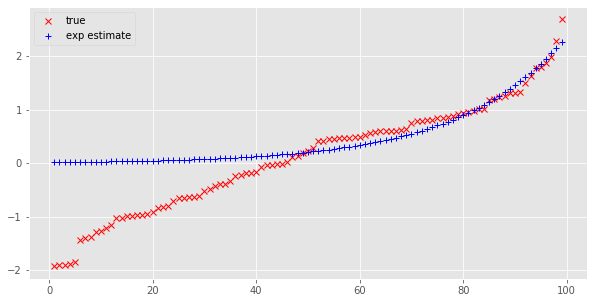

In [30]:
e = error()
p = [0,0]
params_line = lm.least_squares(e.mexp,p,args=(x,y)).x
p1 , p2 = params_line
pt.figure(figsize=(10,5))
pt.plot(x , y , 'rx' , label = 'true')
pt.plot(x , exp(p1,p2,x),'b+' , label = 'exp estimate')
pt.legend()

p1 , p2

In [121]:
y = np.sort(np.random.randint(1,100,300))
x = range(len(y))

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


[2, 0.01]

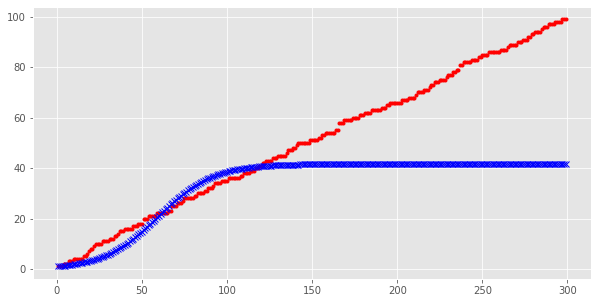

In [122]:
n = 1
def logit(p1 , p2 , x , i=1):
    return p1 / ( 1 + ( (p1-x[i])/x[i] )*np.exp(-p2*x[i:] ) ) 

e = error()

p = [2,0.01]

params = lm.least_squares(e.mlogit,p,args=(x,y[n:])).x
p1 , p2= params
pt.figure(figsize=(10,5))
pt.plot(x[n:] , y[n:] , 'r.' , label = 'true')
pt.plot(x[n:] , logit(p1,p2,x),'bx' , label = 'logit estimate')
# pt.legend()

p

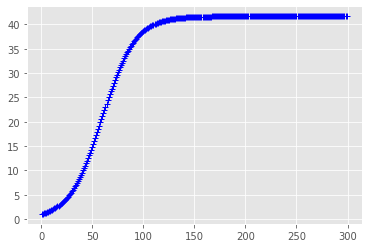

In [123]:
pt.plot(x[n:] , logit(p1,p2,x),'b+' , label = 'logit estimate')